Analyzing GD Methods on a mock cost function: $f(w) = a + b^{T}.w + w^{T}.C.w$ <br>
Where $b^{t}=$ $\begin{pmatrix} 1 & -1\end{pmatrix}$ and C=$\begin{pmatrix} 1 & 0 \\ 0 & 2\end{pmatrix}$


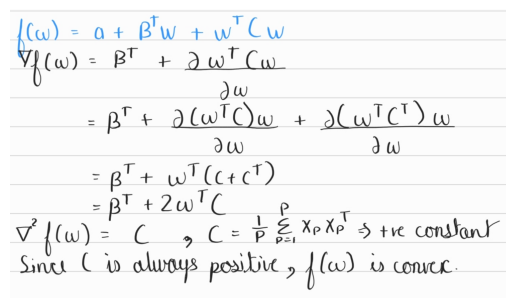

In [1]:
import matplotlib.pyplot as plt

image = plt.imread('img.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

Analytical Approach and Autograd

Gradient Descents constant alpha, Iterations:  53
Delay 1.33  ms  Time/Iteration 0.0252 
Learning rate alpha 0.05 


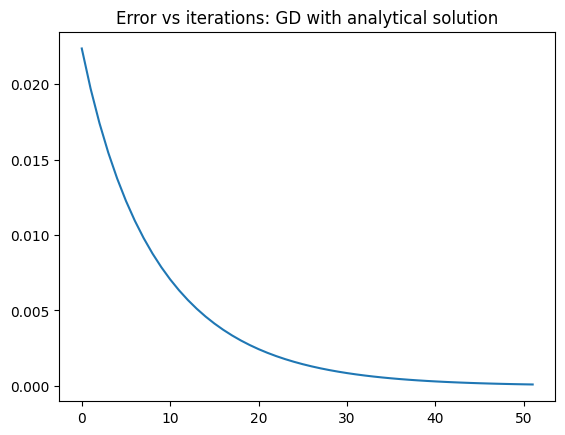

(array([[-0.49916509,  0.24999954]]), 53, 9.27680239986232e-05, 1.3339519500732422) 

Gradient Descents constant alpha, Iterations:  53
Delay 15.2  ms  Time/Iteration 0.287 
Learning rate alpha 0.05 
(array([-0.49916509,  0.24999954]), 53, 9.27680239986232e-05, 15.222787857055664)


In [2]:
from autograd import grad
from autograd import numpy as np
import time

ModelResults = {}

def f(w):
    a = 20
    b = np.array([1., -1.]).reshape(2,1)
    C = np.array([[1., 0.], [0., 2.]]).reshape(2,2)
    return(a+np.dot(b.T,w)+np.dot(w.T,np.dot(C,w)))

def del_f(w):
    b = np.array([1., -1.]).reshape(2,1)
    C = np.array([[1., 0.], [0., 2.]]).reshape(2,2)
    return(b.T + 2*np.dot(w, C))   

def GD_analytical(g,w,alpha,iter,tol=1e-4):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    while ((count<=iter) and (updatew>tol)):
        Dg = del_f(w)
        absDg = np.linalg.norm(Dg) # magnitude
        w = w - alpha*Dg
        updatew = absDg*alpha # magnitude of update in w
        errors.append(updatew)
        count += 1
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents constant alpha, Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha)
    plt.plot(range(count-1), errors)
    plt.title("Error vs iterations: GD with analytical solution")
    plt.show()
    return(w,count,updatew,dtime)

ModelResults["GD analytical"] = GD_analytical(f, np.array([-0.3,0.2]), 5e-2, 100)
print(ModelResults["GD analytical"], '\n')

def GD_autograd(g,w,alpha,iter,tol=1e-4):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    while ((count<=iter) and (updatew>tol)):
        gradient = grad(g)
        Dg = gradient(w)
        absDg = np.linalg.norm(Dg) # magnitude
        w = w - alpha*Dg
        updatew = absDg*alpha # magnitude of update in w
        errors.append(updatew)
        count += 1
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents constant alpha, Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha)
    return(w,count,updatew,dtime)

ModelResults["GD autograd"] = GD_autograd(f, np.array([-0.3,0.2]), 5e-2, 100)
print(ModelResults['GD autograd'])

Decreasing Alpha at each iteration

In [3]:
def GD_decreasing_alpha(g,w,alpha,iter,tol=1e-4,e=1e-8):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    while ((count<=iter) and (updatew>tol)):
        gradient = grad(g)
        Dg = gradient(w)
        absDg = np.linalg.norm(Dg) # magnitude
        alpha_k  = (alpha/count)
        w = w - alpha_k*Dg
        updatew = absDg*alpha_k # magnitude of update in w
        errors.append(updatew)
        count += 1
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents decreasing alpha, Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha_k)
    return(w,count,updatew,dtime)

ModelResults["GD decreasing alpha"] = GD_decreasing_alpha(f, np.array([-0.3,0.2]), 5e-1, 100)
print(ModelResults["GD decreasing alpha"])

Gradient Descents decreasing alpha, Iterations:  4
Delay 1.21  ms  Time/Iteration 0.303 
Learning rate alpha 0.167 
(array([-0.5 ,  0.25]), 4, 0.0, 1.2111663818359375)


Normalizing alpha with the gradient magnitude

In [4]:
def GD_decreasing_alpha_norm(g,w,alpha,iter,tol=1e-4,e=1e-8):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    while ((count<=iter) and (updatew>tol)):
        gradient = grad(g)
        Dg = gradient(w)
        absDg = np.linalg.norm(Dg) # magnitude
        alpha_k  = (alpha*absDg)
        w = w - alpha_k*Dg
        updatew = absDg*alpha_k # magnitude of update in w
        errors.append(updatew)
        count += 1
        # print(absDg)
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents normalized alpha, Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha_k)
    return(w,count,updatew,dtime)

ModelResults["GD alpha norm"] = GD_decreasing_alpha_norm(f, np.array([-0.3, 0.2]), 1, 100)
print(ModelResults["GD alpha norm"])

Gradient Descents normalized alpha, Iterations:  32
Delay 10.2  ms  Time/Iteration 0.318 
Learning rate alpha 0.00983 
(array([-0.49576339,  0.25112471]), 32, 9.663429738660632e-05, 10.167360305786133)


Lipschitz constant

In [5]:
def GD_decreasing_alpha_lip(g,w,alpha,iter,tol=1e-4,e=1e-8):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    while ((count<=iter) and (updatew>tol)):
        gradient = grad(g)
        Dg = gradient(w)        
        lipschitz = np.linalg.norm(np.array([[1., 0.], [0., 2.]]).reshape(2,2)) # l2 norm of C
        absDg = np.linalg.norm(Dg) # magnitude
        alpha_k  = (alpha/lipschitz)
        w = w - alpha_k*Dg
        updatew = absDg*alpha_k # magnitude of update in w
        errors.append(updatew)
        count += 1
        # print(absDg)
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents decreasing alpha (lipschitz), Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha_k)
    return(w,count,updatew,dtime)

ModelResults["GD decreasing alpha lip"] = GD_decreasing_alpha_lip(f, np.array([-0.3, 0.2]), 5e-1, 100)
print(ModelResults["GD decreasing alpha lip"])

Gradient Descents decreasing alpha (lipschitz), Iterations:  14
Delay 5.92  ms  Time/Iteration 0.423 
Learning rate alpha 0.224 
(array([-0.49990999,  0.25      ]), 14, 7.281707545936376e-05, 5.916595458984375)


Steepest Descents

In [6]:
z = (1+2.236)/2 ## Golden ratio

def goldendelta(x4,x1,z):
    return((x4-x1)/z)

def goldensearch(g,w,h,x1,x4,accuracy):
    ## initial positions of the four points
    ## x1 = sigma/10
    ## x4 = sigma*10
    x2 = x4 - goldendelta(x4,x1,z)
    x3 = x1 + goldendelta(x4,x1,z)
    ## initial values of the function at the four points
    f1 = g(w-x1*h); f2 = g(w-x2*h); f3 = g(w-x3*h); f4 = g(w-x4*h)
    i = 0
    error = abs(x4-x1)
    while error > accuracy:
        if (f2<f3):
            x4,f4 = x3,f3
            x3,f3 = x2,f2
            x2 = x4 - goldendelta(x4,x1,z)
            f2 = g(w-x2*h)
        else:
            x1,f1 = x2,f2
            x2,f2 = x3,f3
            x3 = x1 + goldendelta(x4,x1,z)
            f3 = g(w-x3*h)
        i += 1
        error = abs(f4-f1)
    return((x1+x4)/2.0,i,error)

def golden(g,w,h,alpha):
    alpha,iter,error = goldensearch(g,w,h,alpha/10.,alpha*10.0,1e-6)
    ## print('best aplha', alpha, error)
    return alpha

def GD_steepest(g,w,alpha,iter,tol=1e-4):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    while ((count<=iter) and (updatew>tol)):
        gradient = grad(g)
        Dg = gradient(w)
        absDg = np.linalg.norm(Dg) # magnitude
        alpha_k = golden(f, w, Dg, alpha)
        w = w - alpha_k*Dg
        updatew = absDg*alpha_k # magnitude of update in w
        errors.append(updatew)
        count += 1
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents constant alpha, Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha)
    return(w,count,updatew,dtime)

ModelResults["GD steepest"] = GD_steepest(f, np.array([-0.3,0.2]), 5e-2, 100)
print(ModelResults["GD steepest"])

Gradient Descents constant alpha, Iterations:  8
Delay 6.99  ms  Time/Iteration 0.873 
Learning rate alpha 0.05 
(array([-0.49996923,  0.25001472]), 8, 8.74353126127921e-05, 6.9866180419921875)


Momentum and Steepest Descents

In [7]:
def GD_momentum_and_steepest(g,w,alpha,beta,iter,tol=1e-4):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    h = 0
    while ((count<=iter) and (updatew>tol)):
        gradient = grad(g)
        Dg = gradient(w)
        # absDg = np.linalg.norm(Dg) # magnitude
        alpha_k = golden(f, w, Dg, alpha)
        h = beta*h + (1-beta)*Dg
        w = w - alpha_k*h
        updatew = np.linalg.norm(h)*alpha_k # magnitude of update in w
        errors.append(updatew)
        count += 1
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents constant alpha, Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha)
    print('Beta: %.3g' % beta)
    return(w,count,updatew,dtime)

for i in [0, 0.5, 0.75]:
    ModelResults["GD momentum and steepest descents with beta: " + str(i)] = GD_momentum_and_steepest(f, np.array([-0.3,0.2]), 1, i, 100)
    print(ModelResults["GD momentum and steepest descents with beta: " + str(i)], '\n')

Gradient Descents constant alpha, Iterations:  101
Delay 65  ms  Time/Iteration 0.644 
Learning rate alpha 1 
Beta: 0
(array([-0.5       ,  0.24975438]), 101, 0.0004528488004477062, 65.04058837890625) 

Gradient Descents constant alpha, Iterations:  20
Delay 15.6  ms  Time/Iteration 0.779 
Learning rate alpha 1 
Beta: 0.5
(array([-0.49986216,  0.24980155]), 20, 6.663390603781474e-05, 15.573978424072266) 

Gradient Descents constant alpha, Iterations:  45
Delay 33.2  ms  Time/Iteration 0.738 
Learning rate alpha 1 
Beta: 0.75
(array([-0.49961711,  0.25077015]), 45, 5.801208988182876e-05, 33.20598602294922) 



Momentum Only

In [8]:
def GD_momentum(g,w,alpha,beta,iter,tol=1e-4):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    h = 0
    while ((count<=iter) and (updatew>tol)):
        gradient = grad(g)
        Dg = gradient(w)
        # absDg = np.linalg.norm(Dg) # magnitude
        h = beta*h + (1-beta)*Dg
        w = w - alpha*h
        updatew = np.linalg.norm(h)*alpha # magnitude of update in w
        errors.append(updatew)
        count += 1
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents constant alpha, Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha)
    print('Beta: %.3g' % beta)
    return(w,count,updatew,dtime)

for i in [0, 0.5, 0.75]:
    ModelResults["GD momentum only with beta: " + str(i)] = GD_momentum(f, np.array([-0.3,0.2]), 1, i, 100)
    print(ModelResults["GD momentum only with beta: " + str(i)], '\n')

Gradient Descents constant alpha, Iterations:  101
Delay 27.6  ms  Time/Iteration 0.273 
Learning rate alpha 1 
Beta: 0
(array([-3.0000000e-01, -2.5768876e+46]), 101, 3.4358501382134065e+46, 27.59099006652832) 

Gradient Descents constant alpha, Iterations:  14
Delay 4.2  ms  Time/Iteration 0.3 
Learning rate alpha 1 
Beta: 0.5
(array([-0.50219727,  0.24943848]), 14, 5.45915033568822e-05, 4.197359085083008) 

Gradient Descents constant alpha, Iterations:  46
Delay 13.5  ms  Time/Iteration 0.293 
Learning rate alpha 1 
Beta: 0.75
(array([-0.50031516,  0.24993534]), 46, 4.7073366524995137e-05, 13.472557067871094) 



Regularization

In [9]:
def f1(w, l):
    a = 20
    b = np.array([1., -1.]).reshape(2,1)
    C = np.array([[1., 0.], [0., 2.]]).reshape(2,2)
    return(a+np.dot(b.T,w)+np.dot(w.T,np.dot(C,w)) + l*(np.linalg.norm(w)))

def GD_regularized(g,w,alpha,l,iter,tol=1e-4):
    tbeg = time.time()
    count = 1
    absDg = 1.0
    updatew = 1.
    errors = []
    while ((count<=iter) and (updatew>tol)):
        gradient = grad(g)
        Dg = gradient(w, l)
        absDg = np.linalg.norm(Dg) # magnitude
        w = w - alpha*Dg
        updatew = absDg*alpha # magnitude of update in w
        errors.append(updatew)
        count += 1
    tend = time.time()
    dtime = (tend-tbeg)*1000 ## ms
    print('Gradient Descents constant alpha, Iterations: ',count)
    print('Delay %.3g ' % dtime, 'ms ', 'Time/Iteration %.3g ' % (dtime/count))
    print('Learning rate alpha %.3g ' % alpha)
    return(w,count,updatew,dtime)

ModelResults["GD regularized"] = GD_regularized(f1, np.array([-0.3,0.2]), 5e-1, 0.5, 100)
print(ModelResults["GD regularized"])

Gradient Descents constant alpha, Iterations:  101
Delay 35.8  ms  Time/Iteration 0.354 
Learning rate alpha 0.5 
(array([-0.4945678 , 23.50829635]), 101, 46.266651725297336, 35.79306602478027)


Analysis and Comments

In [10]:
import pandas as pd
from IPython.display import display

Results = pd.DataFrame.from_dict(ModelResults, orient='index', columns= ['Weights', 'Iterations', 'Update Mag', 'Training Time(ms)'])
display(Results)

,Weights,Iterations,Update Mag,Training Time(ms)
GD analytical,"[[-0.4991650884164141, 0.24999954328073834]]",53,9.276802e-05,1.333952
GD autograd,"[-0.4991650884164141, 0.24999954328073834]",53,9.276802e-05,15.222788
GD decreasing alpha,"[-0.5, 0.25]",4,0.000000e+00,1.211166
GD alpha norm,"[-0.49576338614834703, 0.2511247057711257]",32,9.663430e-05,10.167360
GD decreasing alpha lip,"[-0.4999099931448095, 0.24999999999998987]",14,7.281708e-05,5.916595
GD steepest,"[-0.4999692287496054, 0.25001471985498946]",8,8.743531e-05,6.986618
GD momentum and steepest descents with beta: 0,"[-0.5, 0.24975437800272476]",101,4.528488e-04,65.040588
GD momentum and steepest descents with beta: 0.5,"[-0.4998621617452576, 0.24980155308697335]",20,6.663391e-05,15.573978
GD momentum and steepest descents with beta: 0.75,"[-0.49961710772304374, 0.25077014871868103]",45,5.801209e-05,33.205986
GD momentum only with beta: 0,"[-0.30000000000000004, -2.576887603660055e+46]",101,3.435850e+46,27.590990


Analytical GD takes a lot less time than GD with autograd, but their results are the same even the iterations are the same. <br>
Decreasing alpha with iterations converges to the optimal very quickly, in 4 iterations. It also took the least amount of time. <br>
GD with normalized alpha was slower than the above but converged to the correct solution. <br>
Tuning alpha with the Lipschitz constant converged quicker than the above ad in less iterations. <br>
Steepest GD converged much quicker than regular GD thanks to linesearch but it took  more time than above because linesearch is time consuming. <br>
In GD with momentum and steepest descents, beta = 0.5 diverged very quickly compared to 0, where the model seems to diverge and 0.75 where the model converges but slower. <br>
In GD with momentum only results were similar to the above but beta = 0 was quicker than above. Here, steepest descents did not help.
GD with regularization diverges.